# libraries

In [545]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [546]:
%matplotlib inline
sns.set()

In [547]:
import warnings
warnings.filterwarnings('ignore')

# **loading data**

In [548]:
df= pd.read_csv('NFLX.csv')

In [549]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [550]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [551]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


# EDA


In [553]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [554]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1004    False
1005    False
1006    False
1007    False
1008    False
Length: 1009, dtype: bool

In [555]:
df.shape

(1009, 7)

In [556]:
num_of_dup = 0
for x, y in zip(df['Adj Close'], df['Close']):
    if x == y:
        num_of_dup += 1
print(f'number of duplicates in close and adj close columns is : {num_of_dup}')

number of duplicates in close and adj close columns is : 1009


**so since 'adj close' column is identical to 'close' column we can drop one of them** 

In [557]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# dropping duplicated columns and visualize missing values and outliers

In [558]:
df.drop('Adj Close' , axis=1 , inplace= True)
df

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200


In [559]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<Axes: >

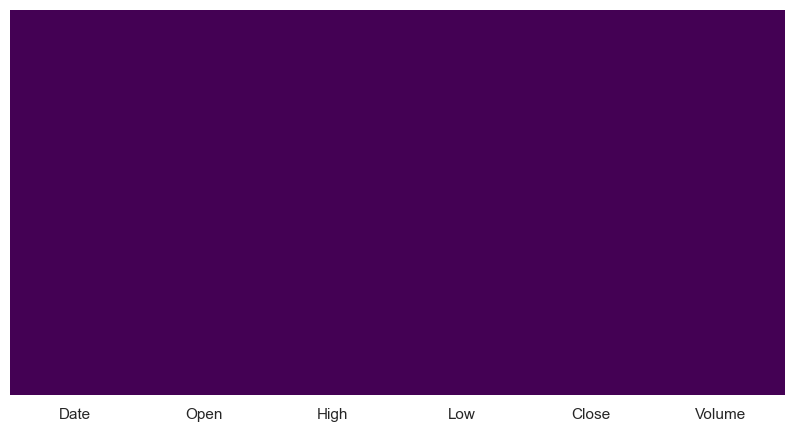

In [560]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna() , cbar=False , yticklabels=False , cmap='viridis')

**no missing values**|

<Axes: title={'center': 'volume column'}>

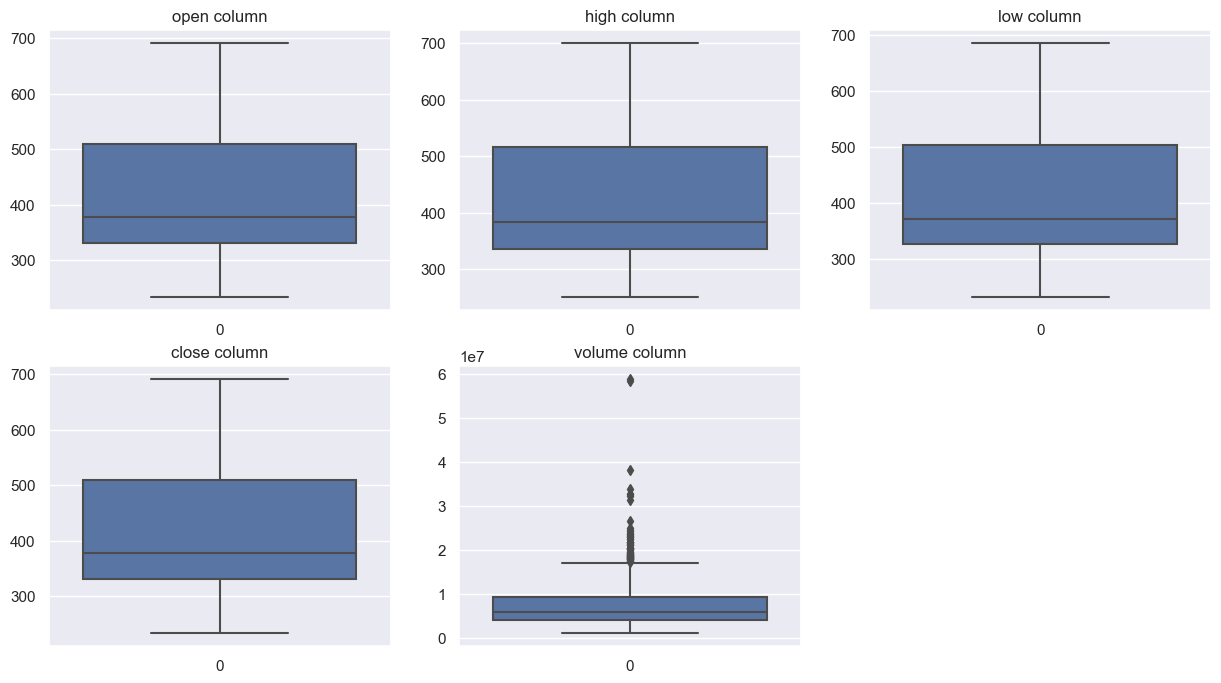

In [561]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.title('open column')
sns.boxplot(df.Open , )

plt.subplot(2,3,2)
plt.title('high column')
sns.boxplot(df.High)

plt.subplot(2,3,3)
plt.title('low column')
sns.boxplot(df.Low)

plt.subplot(2,3,4)
plt.title('close column')
sns.boxplot(df.Close)

plt.subplot(2,3,5)
plt.title('volume column')
sns.boxplot(df.Volume)


<Axes: title={'center': 'volume column'}>

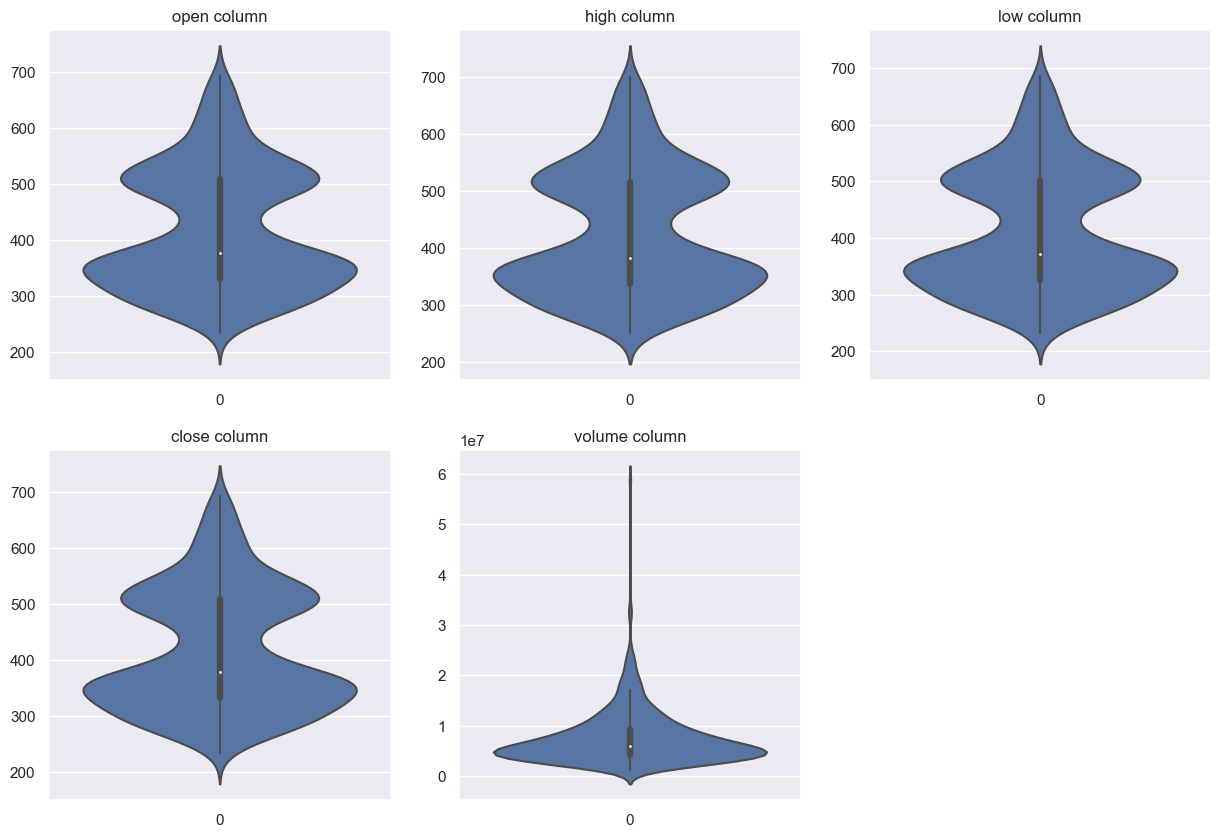

In [562]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title('open column')
sns.violinplot(df.Open , )

plt.subplot(2,3,2)
plt.title('high column')
sns.violinplot(df.High)

plt.subplot(2,3,3)
plt.title('low column')
sns.violinplot(df.Low)

plt.subplot(2,3,4)
plt.title('close column')
sns.violinplot(df.Close)

plt.subplot(2,3,5)
plt.title('volume column')
sns.violinplot(df.Volume)

In [563]:
df

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200


In [564]:
for x in df.loc[:,'Open':'Volume'] :
    print(f'for column {x} minimum value = {df[x].min()} , maximum value = {df[x].max()}')

for column Open minimum value = 233.919998 , maximum value = 692.349976
for column High minimum value = 250.649994 , maximum value = 700.98999
for column Low minimum value = 231.229996 , maximum value = 686.090027
for column Close minimum value = 233.880005 , maximum value = 691.690002
for column Volume minimum value = 1144000 , maximum value = 58904300


# handling outliers

In [565]:
df['Volume_log'] = np.log1p(df['Volume'])  

In [566]:
df

,Date,Open,High,Low,Close,Volume,Volume_log
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,16.291721
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,16.348874
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,16.010678
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,16.046245
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,16.643232
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,16.813615
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,16.930904
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,16.478982
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,16.108571


<Axes: title={'center': 'Volume_log column'}>

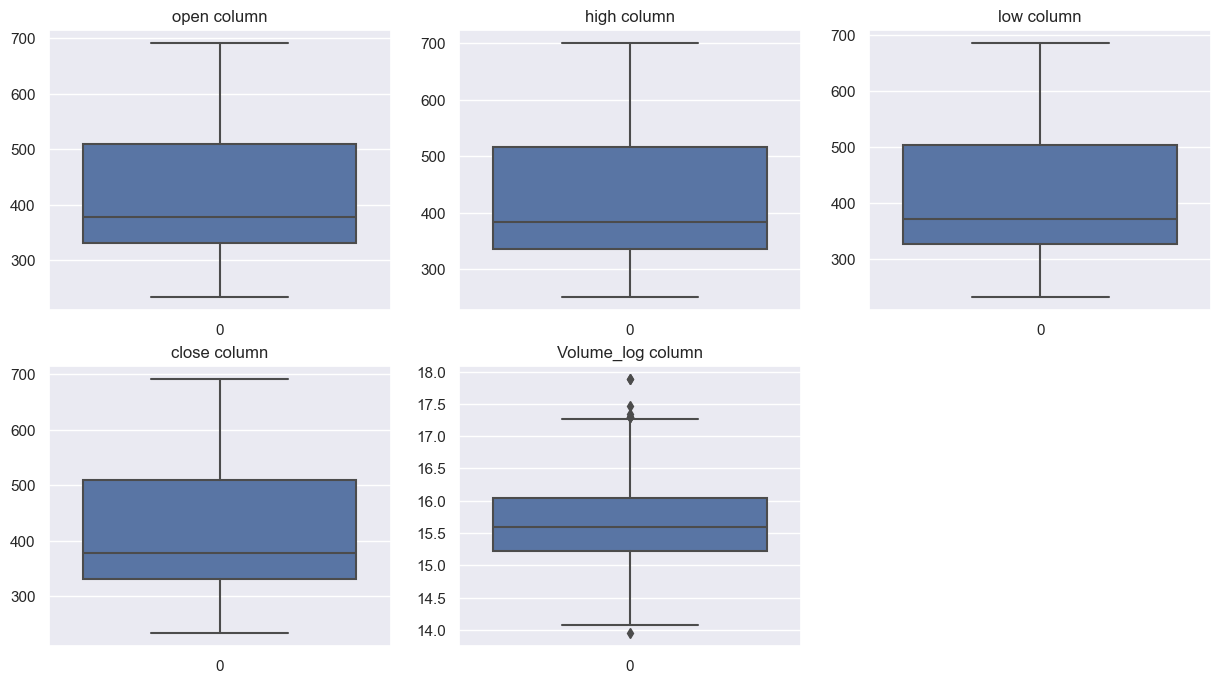

In [567]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.title('open column')
sns.boxplot(df.Open , )

plt.subplot(2,3,2)
plt.title('high column')
sns.boxplot(df.High)

plt.subplot(2,3,3)
plt.title('low column')
sns.boxplot(df.Low)

plt.subplot(2,3,4)
plt.title('close column')
sns.boxplot(df.Close)

plt.subplot(2,3,5)
plt.title('Volume_log column')
sns.boxplot(df.Volume_log)



# visualizing data distribution

<Axes: title={'center': 'Volume_log column'}, xlabel='Volume_log', ylabel='Density'>

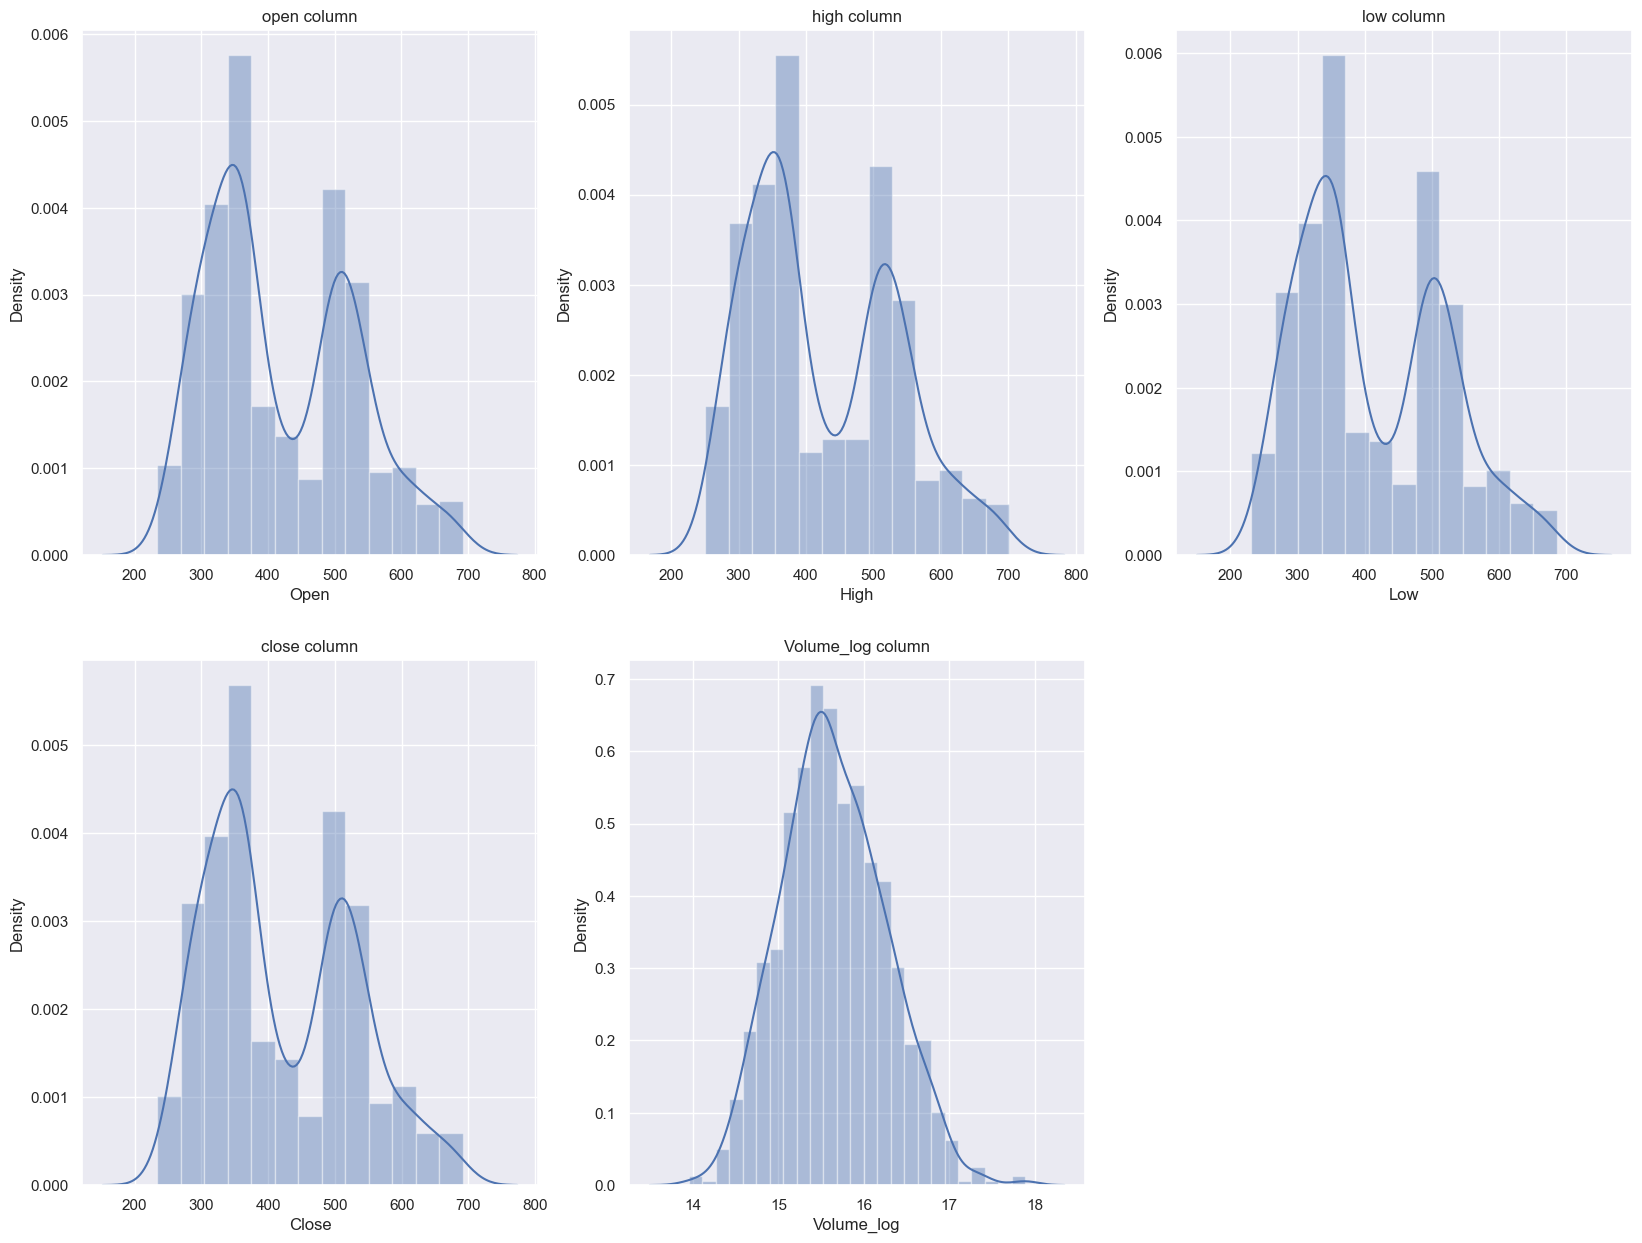

In [568]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.title('open column')
sns.distplot(df.Open  )

plt.subplot(2,3,2)
plt.title('high column')
sns.distplot(df.High)

plt.subplot(2,3,3)
plt.title('low column')
sns.distplot(df.Low)

plt.subplot(2,3,4)
plt.title('close column')
sns.distplot(df.Close)

plt.subplot(2,3,5)
plt.title('Volume_log column')
sns.distplot(df.Volume_log)

<Axes: title={'center': 'Volume_log column'}, ylabel='Volume_log'>

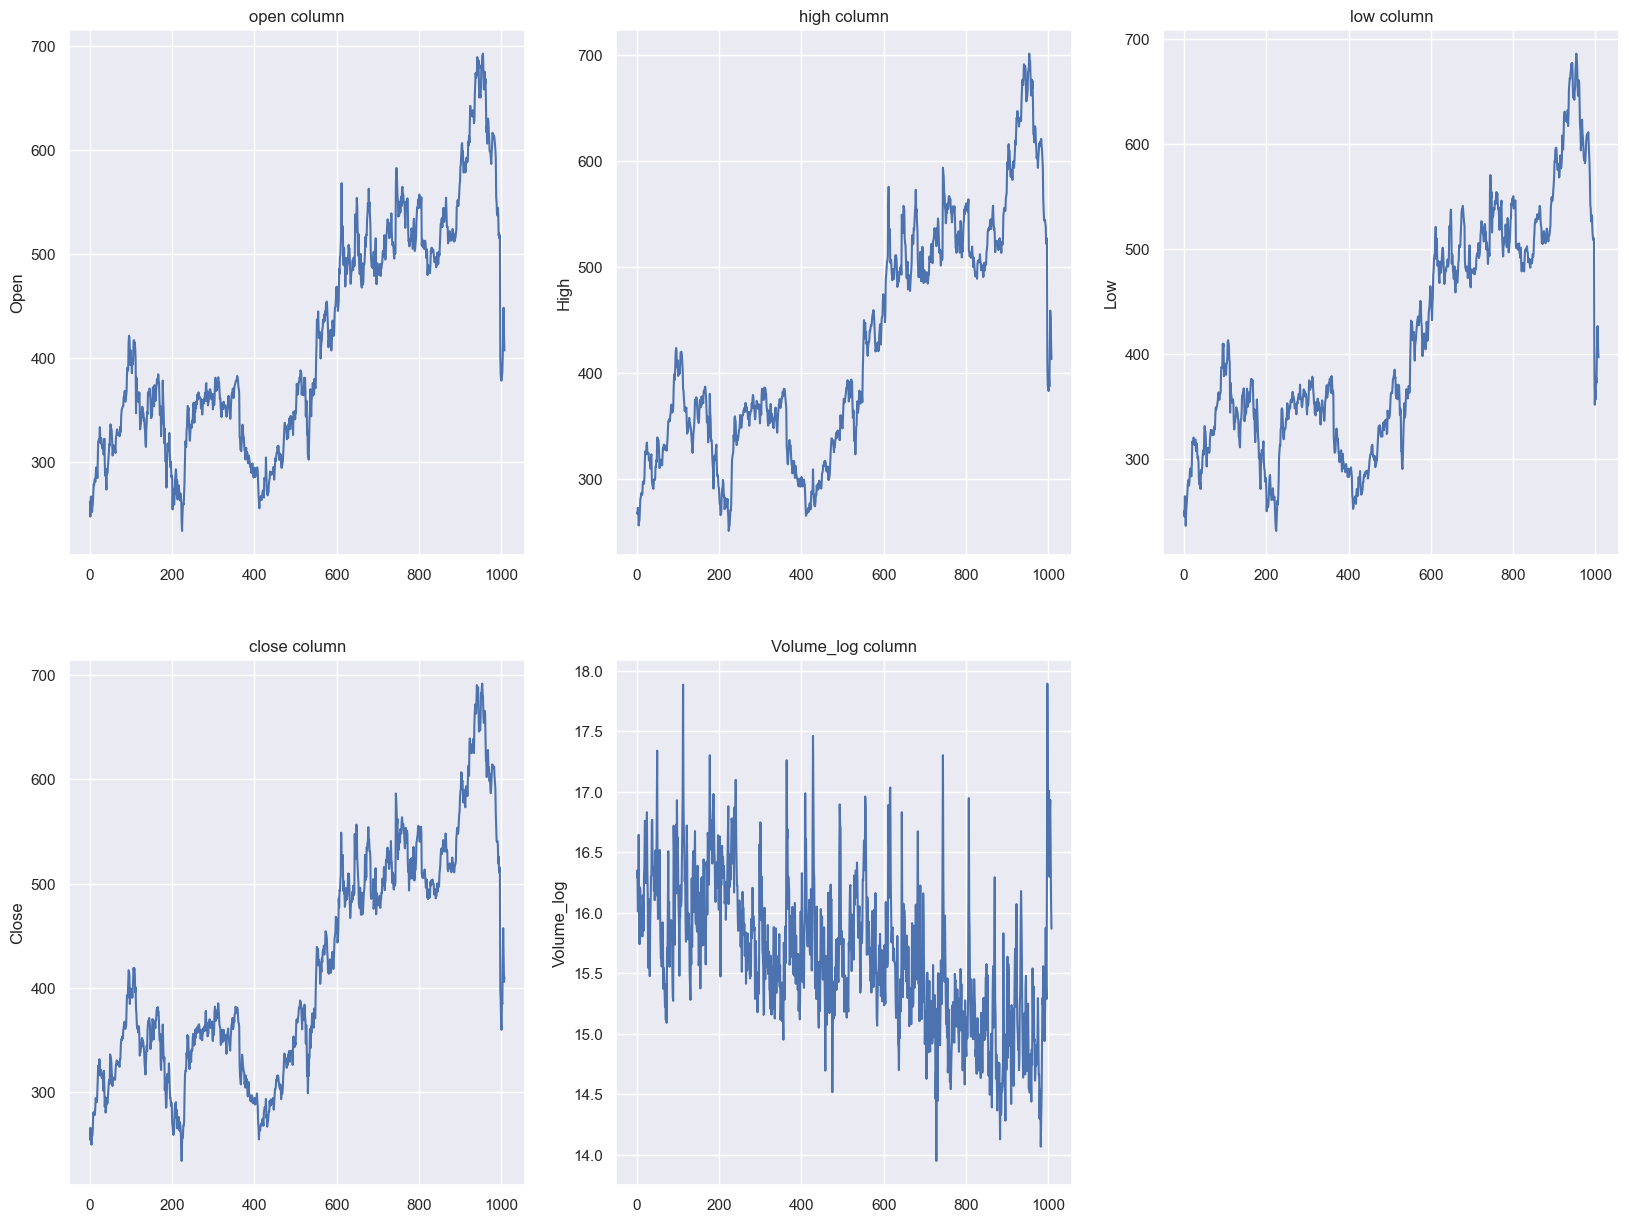

In [569]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.title('open column')
sns.lineplot(df.Open  )

plt.subplot(2,3,2)
plt.title('high column')
sns.lineplot(df.High)

plt.subplot(2,3,3)
plt.title('low column')
sns.lineplot(df.Low)

plt.subplot(2,3,4)
plt.title('close column')
sns.lineplot(df.Close)

plt.subplot(2,3,5)
plt.title('Volume_log column')
sns.lineplot(df.Volume_log)



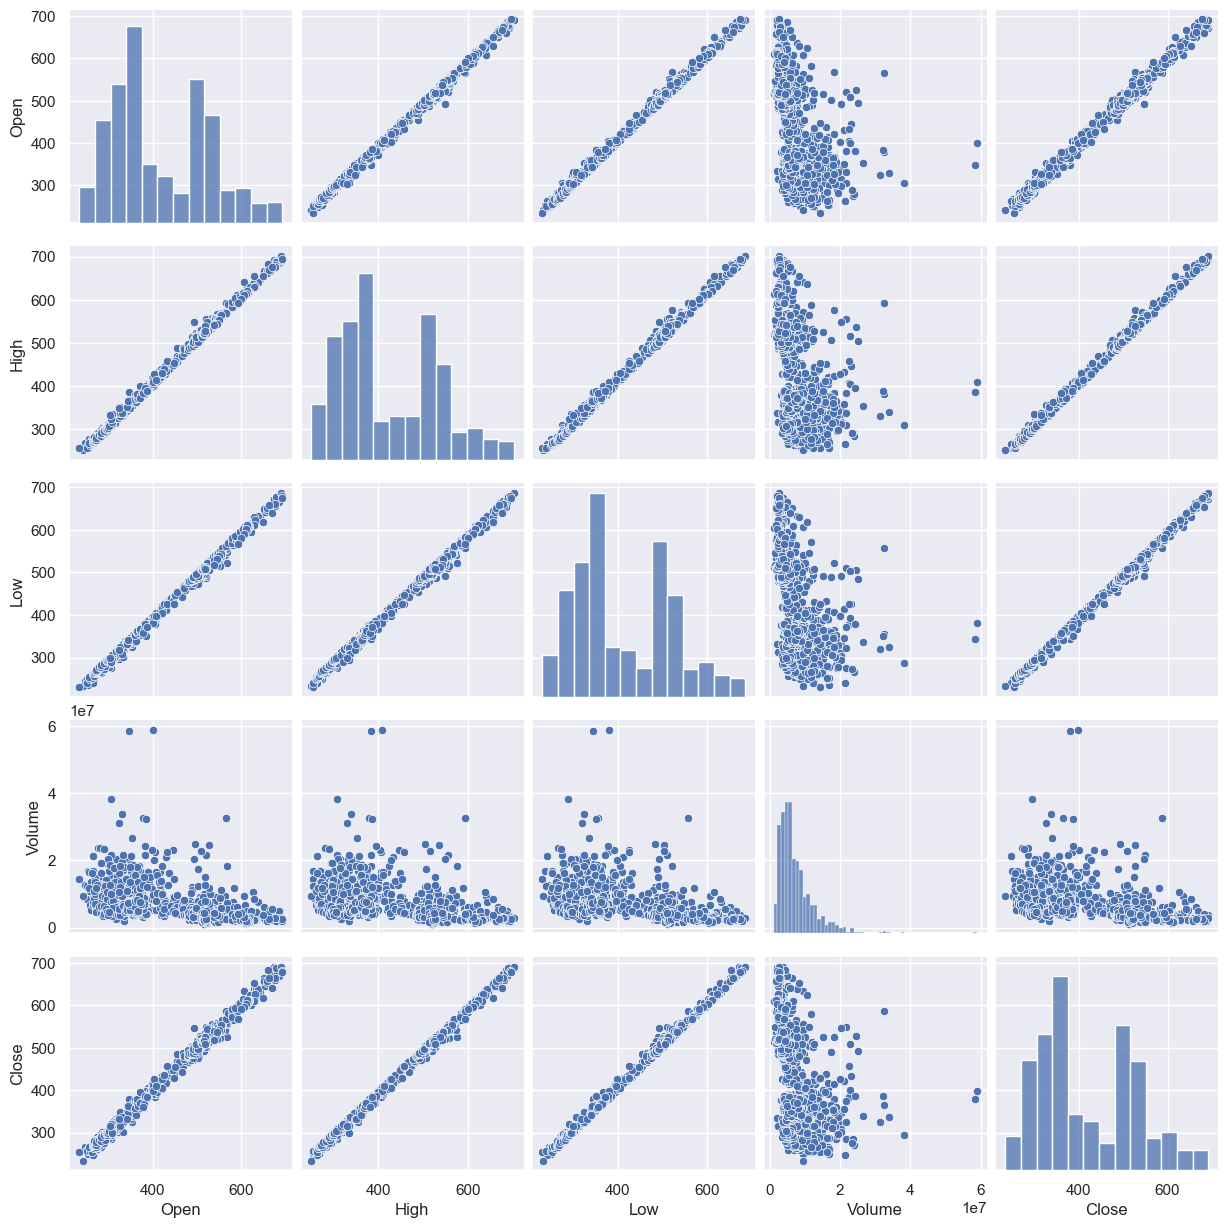

In [570]:
sns.pairplot(df[['Open', 'High', 'Low', 'Volume', 'Close']])
plt.show()

# **model**
- **Linear Regression**
- **LSTM**

In [571]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df

,Open,High,Low,Close,Volume,Volume_log
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,16.291721
2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,16.348874
2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,16.010678
2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,16.046245
2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,16.643232
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,16.813615
2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,16.930904
2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,16.478982


In [572]:
from sklearn.model_selection import train_test_split

In [573]:
x = df[['Open', 'High','Low','Volume_log']].values
y = df['Close'].values

In [574]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.25 , random_state=42 )

# **Linear Regression**

In [575]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [576]:
LR.fit(x_train , y_train)

LinearRegression()

In [577]:
y_pred = LR.predict(x_test)

In [578]:
y_pred

array([508.46589456, 492.86387509, 507.02001133, 381.14658689,
       318.68856152, 480.26503728, 493.34001608, 320.74174087,
       361.0458042 , 328.38905115, 525.71024137, 330.84307733,
       585.51066594, 313.87980343, 339.10771235, 545.71645395,
       534.13063966, 617.42749134, 353.02988631, 394.37209104,
       390.08770945, 375.56974456, 267.66863335, 354.45682231,
       435.56712619, 371.94661873, 307.77116872, 354.05669616,
       298.66498544, 508.74869485, 564.54833   , 514.929773  ,
       412.46450656, 338.39506961, 507.30423476, 350.31713578,
       587.21732324, 291.50235649, 361.39006343, 364.85545329,
       356.43395719, 351.28360417, 345.76215143, 609.24204369,
       370.75475929, 361.82744206, 310.22087641, 634.74260033,
       503.00904699, 548.28556648, 493.20298343, 517.63893604,
       310.3445307 , 490.7170573 , 425.15610669, 569.47656395,
       310.00888738, 307.12716729, 329.40203818, 318.3947144 ,
       507.9991361 , 278.60215098, 283.99205134, 484.79

In [579]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'the accuracy of the model = {r2:.2f}')

the accuracy of the model = 1.00


# **LSTM**

In [580]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [581]:
df

,Open,High,Low,Close,Volume,Volume_log
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,16.291721
2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,16.348874
2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,16.010678
2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,16.046245
2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,16.643232
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,16.813615
2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,16.930904
2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,16.478982


In [582]:
data = df[['Close']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


def create_sequences(dataset, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(dataset)):
        X.append(dataset[i-seq_length:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [583]:

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [584]:

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

In [585]:
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0600 - val_loss: 0.0238
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0055 - val_loss: 0.0060
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0044 - val_loss: 0.0058
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0034 - val_loss: 0.0055
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0039 - val_loss: 0.0058
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0036 - val_loss: 0.0050
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 0.0047
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0032 - val_loss: 0.0045
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0029 - val_loss: 0.0060
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0035 - val_loss: 0.0041
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

In [586]:


predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))



6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [587]:
from sklearn.metrics import  r2_score

r2 = r2_score(actual, predictions)

print(f'R² Score: {r2:.2f}')


R² Score: 0.93


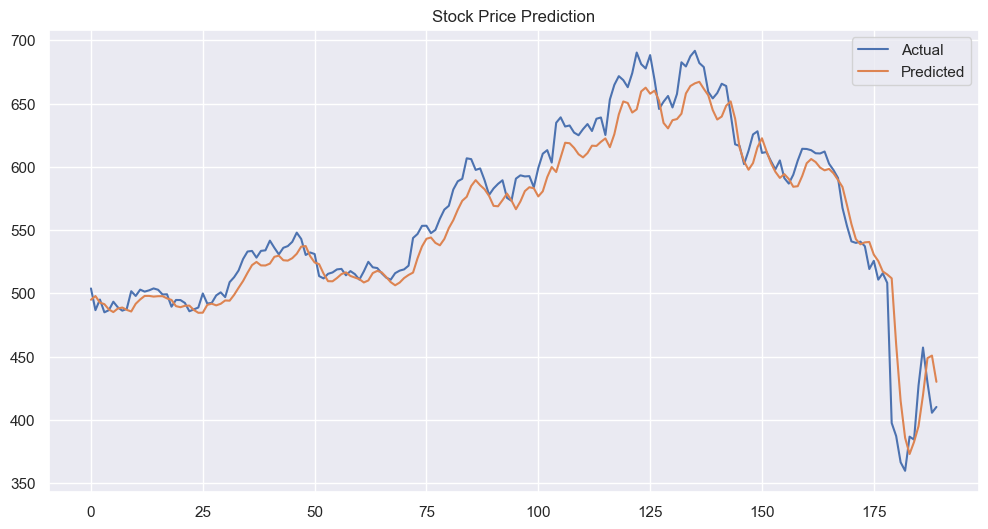

In [588]:


plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

# **thanks**